<a href="https://colab.research.google.com/github/ILPATHERA/ML2_Pokemoncreator/blob/main/ML2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Machine Learning 2 Image Classification Model

## Gotta Class'em all

## Introduction

Welcome to this Jupyter Notebook, which focuses on the classification of Pokémon images using a machine learning model. In this project, we will utilize a Pokémon dataset to train an image classification model. The trained model will then be used to classify new Pokémon images.


## Dataset: Pokémon Images


I obtained my data from Kaggle. The Pokemon dataset consists of a CSV file that includes the name of each Pokemon and its two types. Additionally, the folder contains the images of the Pokemon.
The goal is to create a model capable of identifying these Pokémon based on their visual characteristics. We will divide the dataset into training and testing sets.

### Import Libraries

I could have included all imports which were used in one cell. However, since I like to be able to see in the respective cell which import is needed, I will import this in the respective cell.

### Load Data

I found the dataset on Kaggle. To use this directly, we need the API of Kaggle. In my GitHub repository there is a file called kaggle.json. Download it and upload it below.

Upload kaggle.json

In [46]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"simoneantoniosommer","key":"ccbbebbff4f40fa13f5b9024966cb78c"}'}

Setup Kaggle API

In [47]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 75 Jun 11 13:21 kaggle.json
/content


Giving permission to file

In [48]:
!chmod 600 ~/.kaggle/kaggle.json

Now we check the connection to Kaggle. If the following is a list of datasets, then the connection to the Kaggle API has succeeded.

In [49]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          29373        818  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2743         75  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           5116        106  1.0              
mohithsairamreddy/salary-data 

Now the dataset "pokemon-images-and-types" is downloaded, unzipped and saved to the current working directory of the Jupyter notebook. This dataset contains images of Pokémon along with their type information.

This is the dataset we will use in this Jupyter Notebook.

In [50]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types --force
!unzip /content/pokemon-images-and-types.zip


 81% 2.00M/2.47M [00:00<00:00, 2.89MB/s]
100% 2.47M/2.47M [00:00<00:00, 3.00MB/s]
Archive:  /content/pokemon-images-and-types.zip
replace images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  

The dataset consists of a CSV file and a folder with the images in JPG and PNG format. So that we can connect this accordingly, we add a column to the DF and deposit the respective path of the image.

In [51]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os

#Create df
df = pd.read_csv('/content/pokemon.csv')

# Path to the images
image_folder = '/content/images/images'

#map image names
image_dict = {}
for file in os.listdir(image_folder):
    image_dict[os.path.splitext(file)[0]] = os.path.join(image_folder, file)

#new Column for path
df['image_path'] = df['Name'].map(image_dict)

# Display the DataFrame
print(df.head())
print("...")
print(df.tail())


         Name  Type1   Type2                             image_path
0   bulbasaur  Grass  Poison   /content/images/images/bulbasaur.png
1     ivysaur  Grass  Poison     /content/images/images/ivysaur.png
2    venusaur  Grass  Poison    /content/images/images/venusaur.png
3  charmander   Fire     NaN  /content/images/images/charmander.png
4  charmeleon   Fire     NaN  /content/images/images/charmeleon.png
...
            Name     Type1  Type2                              image_path
804    stakataka      Rock  Steel    /content/images/images/stakataka.jpg
805  blacephalon      Fire  Ghost  /content/images/images/blacephalon.jpg
806      zeraora  Electric    NaN      /content/images/images/zeraora.jpg
807       meltan     Steel    NaN       /content/images/images/meltan.jpg
808     melmetal     Steel    NaN     /content/images/images/melmetal.jpg


To get a glimpse of the data, I will display the first 6 images.

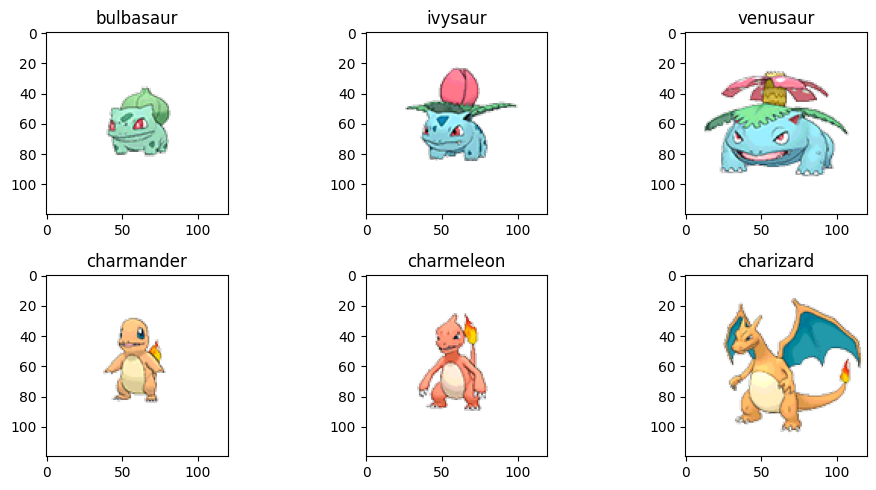

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#path of the images
image_folder = '/content/images/images'

#Create Subset
df_subset = df.head(6)
num_rows = (len(df_subset) - 1) // 3 + 1
num_cols = min(len(df_subset), 3)

#Create Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

#Show Images as plot
for i, ax in enumerate(axes.flat):
    if i < len(df_subset):
        image_name = df_subset.loc[i, 'Name']
        image_path = f'{image_folder}/{image_name}.png'
        #load image
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(image_name)
      
plt.tight_layout()
plt.show()


Now, I would like to perform a detailed examination of my dataset. First and foremost, I want to determine the total number of entries and the number of columns present in the dataset. This information will provide an overview of the dataset's size and structure, allowing me to gain insights into its dimensions. Additionally, I am interested in identifying the names of all the columns in the dataset, which will help me understand the specific variables and attributes captured by the dataset.

In [53]:
# Determine the number of entries and columns in the dataset
num_entries = len(df)
num_columns = len(df.columns)
columns = df.columns

print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)


Number of entries: 809
Number of columns: 4
Colums: Index(['Name', 'Type1', 'Type2', 'image_path'], dtype='object')


With the following function I now check if there are empty fields in my dataset. 


In [54]:
missing_values = df.isnull().sum()
print(missing_values)


Name            0
Type1           0
Type2         404
image_path      0
dtype: int64


Based on this value, I see that 404 fields are missing in the column "Type 2". After analyzing the mentioned fields, I see that this is not relevant, because there are Pokemons that do not necessarily have 2 types.

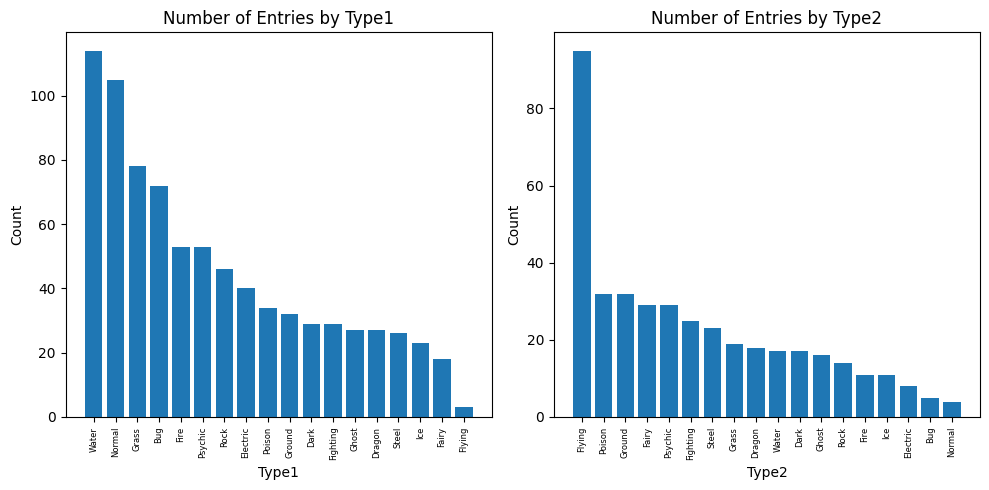

In [55]:
#Create plot for pokemon types
columns = ['Type1', 'Type2']
num_subplots = len(columns)
fig, axes = plt.subplots(1, num_subplots, figsize=(10, 5))
for i, column in enumerate(columns):
    #Count
    counts = df[column].value_counts()
    ax = axes[i]
    ax.bar(counts.index, counts.values)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Number of Entries by {column}')
    ax.tick_params(axis='x', rotation=90, labelsize=6)

plt.tight_layout()
plt.show()

### Transforming the Data

In this code, I step through each row of the DataFrame to categorize the Pokemon based on their types.

For each row, I check the values of the Type1 and Type2 columns to determine the type of the pokemon. If the type matches a particular category, the corresponding type name is appended to the poke_type list and the corresponding code is appended to the code list.

Since the data is not so balanced, I decided to use only the first 5 most represented classes.

**Note:**
I put several hours into training with different models. Due to the many classes, the training lasted forever in each case and the result was not good. Therefore I have decided to limit the classes

In [56]:
poke_type = []
code = []

for i in range(df.shape[0]):
    if (df.iloc[i]['Type1'] == 'Water') or (df.iloc[i]['Type2'] == 'Water'):
        poke_type.append('Water')
        code.append(1)
    elif (df.iloc[i]['Type1'] == 'Normal') or (df.iloc[i]['Type2'] == 'Normal'):
        poke_type.append('Normal')
        code.append(2)
    elif (df.iloc[i]['Type1'] == 'Grass') or (df.iloc[i]['Type2'] == 'Grass'):
        poke_type.append('Grass')
        code.append(3)
    elif (df.iloc[i]['Type1'] == 'Fire') or (df.iloc[i]['Type2'] == 'Fire'):
        poke_type.append('Fire')
        code.append(4)
    elif (df.iloc[i]['Type1'] == 'Bug') or (df.iloc[i]['Type2'] == 'Bug'):
        poke_type.append('Bug')
        code.append(5)
    else:
        poke_type.append('NaN')
        code.append('NaN')


## Create PokeDex for Training :D
Since I am working with a Pokemon dataset I would like to decide which Pokemon I will use for my training. For this I make a new dataset and call it Pokedex

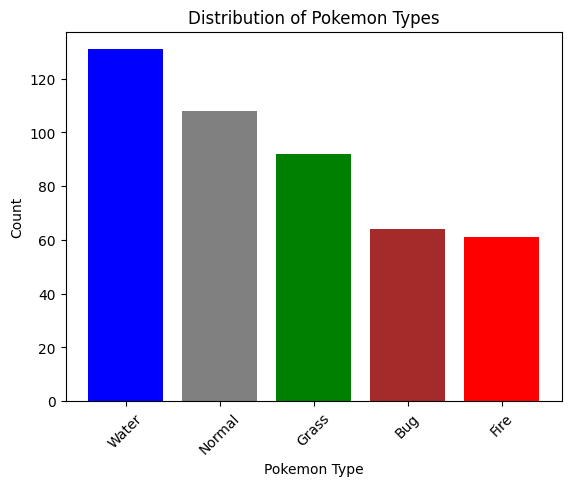

In [57]:
import matplotlib.pyplot as plt

# Create new df
pokedex = df

# Create new columns and drop old ones
pokedex['type'] = poke_type
pokedex['code'] = code
pokedex = pokedex.drop(['Type1', 'Type2', 'Name'], axis=1)

# Check for missing values and drop them
missing_values = pokedex.isnull().sum()
pokedex = pokedex[pokedex['type'] != 'NaN']

#Create categories
category_counts = pokedex['type'].value_counts()
category_colors = {'Water': 'blue', 'Normal': 'gray', 'Grass': 'green', 'Fire': 'red', 'Bug': 'brown'}

# Plot
categories = category_counts.index
counts = category_counts.values
plt.bar(categories, counts, color=[category_colors.get(category, 'gray') for category in categories])
plt.xlabel('Pokemon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokemon Types')
plt.xticks(rotation=45)
plt.show()


In [58]:
pokedex.head()

,image_path,type,code
0,/content/images/images/bulbasaur.png,Grass,3
1,/content/images/images/ivysaur.png,Grass,3
2,/content/images/images/venusaur.png,Grass,3
3,/content/images/images/charmander.png,Fire,4
4,/content/images/images/charmeleon.png,Fire,4


### Creating Training/Validation/Testset

In this section, I am creating the sets for training and testing the model from my dataset.

I have decided to split the data into the following proportions:

*   Training set: 80% of the data
*   Validation set: 10% of the data
*   Test set: 10% of the data


In [59]:
# Determine the number of entries and columns in the dataset
num_entries = len(pokedex)
num_columns = len(pokedex.columns)
columns = pokedex.columns

print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)

Number of entries: 456
Number of columns: 3
Colums: Index(['image_path', 'type', 'code'], dtype='object')


This code creates an image generation generator. This method is used to edit and enhance my training images. This is done by zooming, flipping or adding new pixels to the images.

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2)

In these two methods, from the data which were newly generated and generated batches for the training data and the validation data

In [61]:
train_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=56,
    subset='training')

validation_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=56, 
    subset='validation'
)

test_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=56, 
    subset='validation'
)

Found 365 validated image filenames belonging to 5 classes.
Found 91 validated image filenames belonging to 5 classes.
Found 91 validated image filenames belonging to 5 classes.


In [62]:
train_percentage = len(train_generator.filenames) / len(pokedex) * 100
validation_percentage = len(validation_generator.filenames) / len(pokedex) * 100

print("Training: {:.2f}%".format(train_percentage))
print("Validation: {:.2f}%".format(validation_percentage))


Training: 80.04%
Validation: 19.96%


## Visualizing the Results

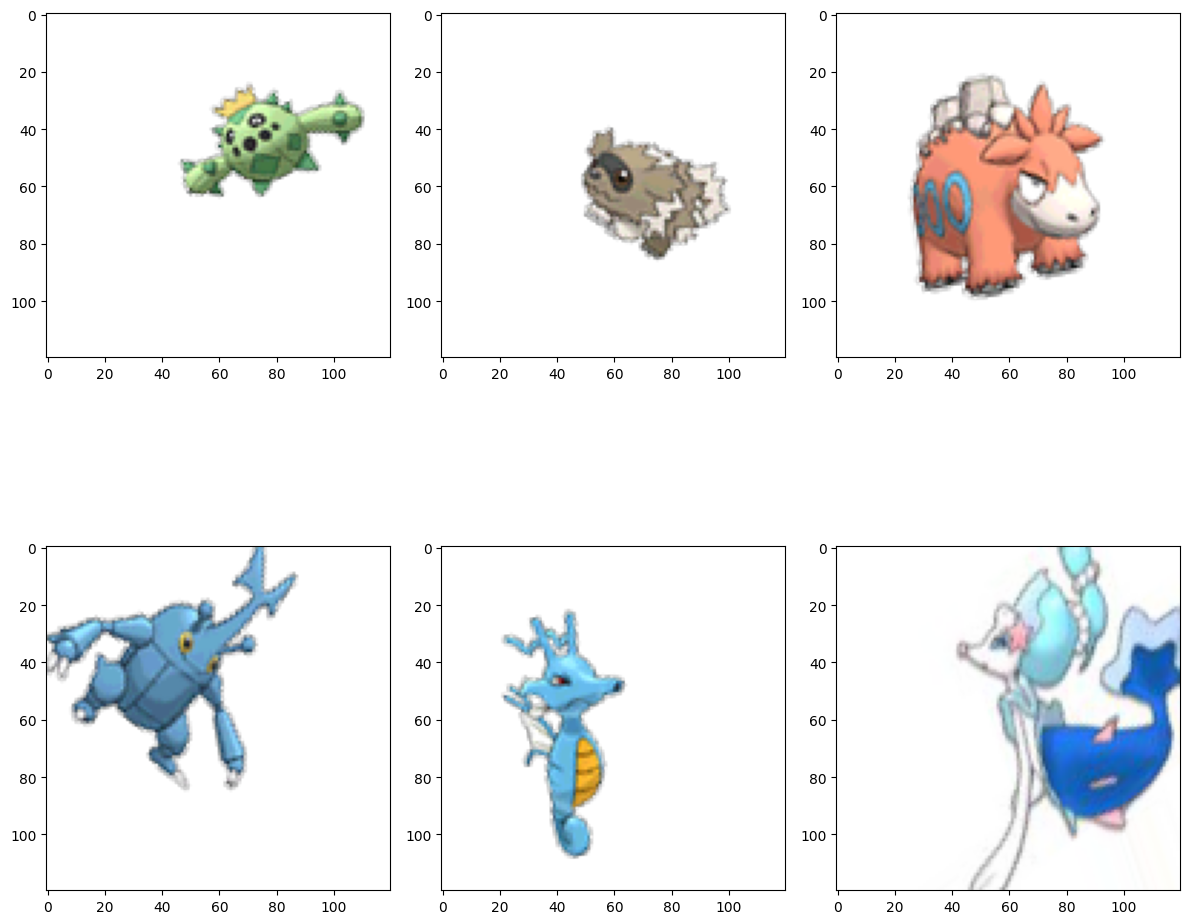

In [63]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Model

### Defining Layers

Lets define the layers of my first Model:

The model defined in this code is a Convolutional Neural Network (CNN). It consists of several layers that are added one after the other.

At the beginning of the model, there is a Dense layer with 4 neurons that serves as the input layer and expects the input shape of the images (120x120x4).

This is followed by several Conv2D layers that apply 2D convolutional operations to the input. Each Conv2D layer uses a ReLU activation function to perform nonlinear transformations. After each Conv2D layer, a MaxPooling2D layer is added to reduce the input volume by downsampling. In addition, a dropout layer with a dropout rate of 0.2 is used to reduce overfitting.

After the Conv2D and MaxPooling2D layers, there is a Flatten layer that converts the output volume into a one-dimensional vector.

This is followed by two Dense layers. The first Dense layer consists of 1024 neurons and uses a ReLU activation function. The second Dense layer has 5 neurons and uses a softmax activation function to calculate the probabilities for the different classes.

My training was very different and it was very hard to find a good architecture. Therefore I also tried to work with an optimizer. But since this did not improve the training success, I commented it out in this part.

In [74]:
import keras as ks
from keras.layers import Dropout
from keras.optimizers import SGD

model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(5, activation='softmax'))


#optimizer = SGD(learning_rate=0.001, momentum=0.9)

Here now follows a small overview of the model architecture

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 120, 120, 4)       20        
                                                                 
 conv2d_16 (Conv2D)          (None, 118, 118, 64)      2368      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 59, 59, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                 

Before you can run the model, it must be compiled. At this point the variable optimizer could be used instead of adam. In my case, however, this did not improve the training. Therefore I will continue this with adam

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In this function the parameters for a callback are defined. If the Accuracy and the val_acc should reach 90%, the training is terminated.

In [67]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.9) and (logs.get('val_acc')>0.9):
            print('\n reached 90% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()

In [68]:
model.layers

Now the training starts. I use in this training after several attempts 2 callbacks. Since it was often the case in the training that the model learned nothing more and it stagnated, I added ReduceLROnPlateau. This reduces the learning rate if it should stagnate.

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
    
)

Epoch 1/100
12/12 [==============================] - 6s 241ms/step - loss: 2.3930 - acc: 0.2548 - val_loss: 1.5907 - val_acc: 0.3516 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 3s 249ms/step - loss: 1.5847 - acc: 0.2685 - val_loss: 1.5531 - val_acc: 0.3516 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 3s 262ms/step - loss: 1.5848 - acc: 0.2712 - val_loss: 1.5597 - val_acc: 0.3516 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 3s 247ms/step - loss: 1.5886 - acc: 0.2658 - val_loss: 1.5782 - val_acc: 0.3516 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 4s 364ms/step - loss: 1.5835 - acc: 0.2712 - val_loss: 1.5435 - val_acc: 0.3516 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 2s 186ms/step - loss: 1.5804 - acc: 0.2712 - val_loss: 1.5529 - val_acc: 0.3516 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 1.5806 - acc: 0.2712 - val_loss: 1.5547 - val_acc

Now the training is over. I have trained this several times and saved several models. However, the training is very different and difficult to reproduce. Therefore I have saved the best achieved result

In [70]:
model_folder = '/content/models/myfirstmodel.h5'
model.save(model_folder)
#Download Model
from google.colab import files
files.download(model_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To get a better overview of the training process, I have reproduced the Accuracy and the val_acc in a plot. In this way I could see how the training has proceeded. 

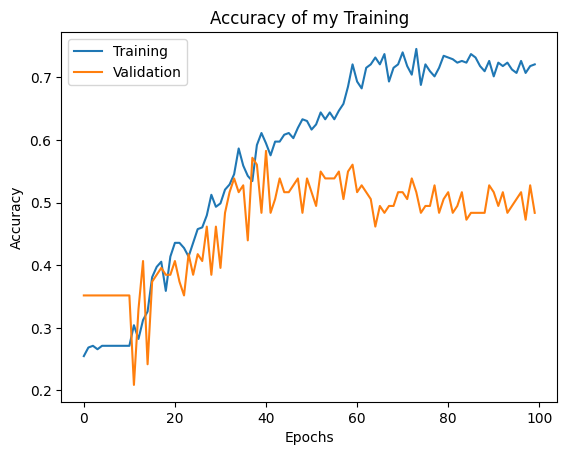

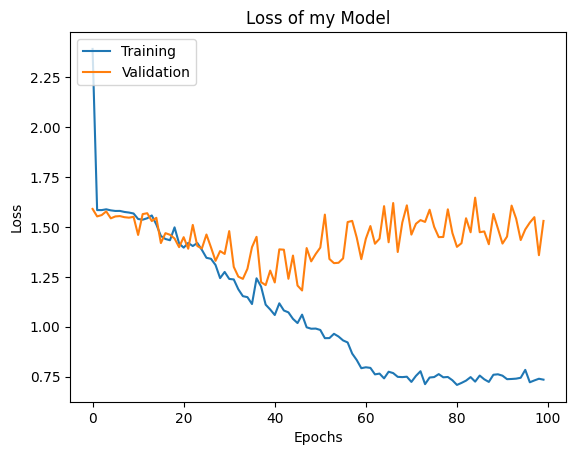

<Figure size 640x480 with 0 Axes>

In [73]:
# Plot Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of my Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

#Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of my Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
plt.savefig('fifthmodelplot.png')



The plot shows some noise in the training and validation data, and the validation data does not perform as well as the training data. One possible explanation for this is the limited amount of available data. Since there isn't much data to work with, I couldn't increase the size of the validation set significantly, and I had to accept these results.

The training was not bad. The accuracy has always improved and the loss decreased. Nevertheless, this is not the case on the validation data. The Accuracy on the validation data is not so good and stays the same. 

-------------------------------------

At this point, you can upload the "testimage3.png" file, which is available on GitHub, to Google Colab and test the model with it.

1/1 [==============================] - 0s 210ms/step


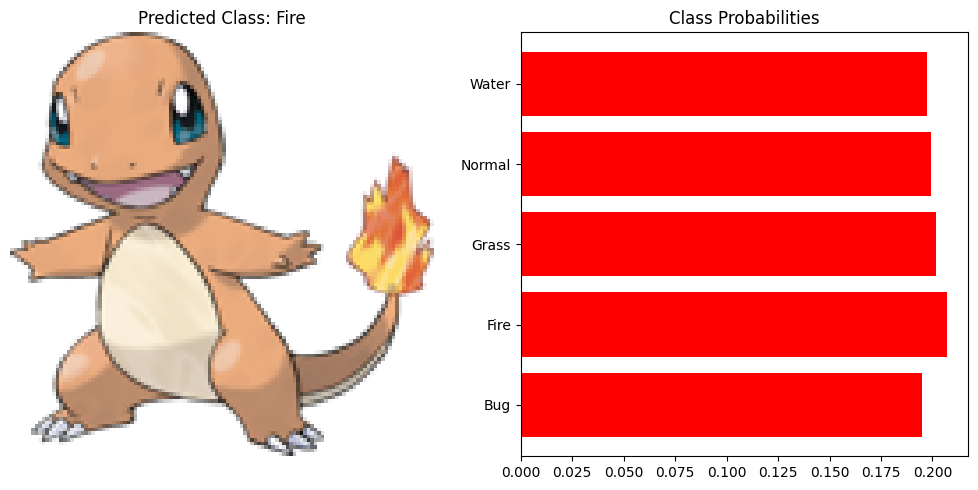

In [75]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

test_image_path = '/content/testimage3.png'  # <--- Passe den Pfad entsprechend an

#Format Image
test_image = Image.open(test_image_path).resize((120, 120))
test_image = np.array(test_image)
test_image = test_image / 255.0  
test_image = np.expand_dims(test_image, axis=0)

#Prediction
class_names = ['Water', 'Normal', 'Grass', 'Fire', 'Bug']
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

#Plot Image and Probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(test_image[0])
ax1.axis('off')
ax1.set_title('Predicted Class: ' + predicted_class_name)

# Change the color of the bar plot
bar_colors = ['red']
ax2.barh(np.arange(len(class_names)), predictions[0], color=bar_colors)

ax2.set_yticks(np.arange(len(class_names)))
ax2.set_yticklabels(class_names)
ax2.invert_yaxis()
ax2.set_title('Class Probabilities')

plt.tight_layout()
plt.show()



Based on this test image, it can be seen that the model has recognized the Pokemon. In the adjacent bar plot, you can see the probabilities of the individual classes.

As I trained multiple times and couldn't reproduce some good results, I started saving the training histories. In case this situation occurs again, I would have some additional histories available.

In [ ]:
import pickle

# Pfad zur Speicherung der History-Daten
history_path = '/content/models/history7.pkl'

# Speichern der History-Daten
with open(history_path, 'wb') as file:
    pickle.dump(history.history, file)


### 2nd Try i gotta class em all


Since I wasn't completely satisfied with this model and wanted to optimize its performance, I decided to take a different approach and reanalyze the data. My goal was to achieve better results by looking at the problem from a different perspective. Therefore, I made the decision to reevaluate the data.

-----------------------------------------------------------


First, as before, I loaded the data and inserted the image paths into the CSV file.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
from pathlib import Path
import re
import tensorflow as tf
from tensorflow import keras
from keras import layers

from pathlib import Path
import os
import re
import pandas as pd


train_dir = '/content/images/images'
train_path = Path(train_dir)

#Create new df

files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))
image_df.head()

# CSV mit dem Namen, primären Typ und sekundären Typ jedes Pokémons laden
label_df = pd.read_csv('pokemon.csv')

# image_df mit label_df zusammenführen
pokedex2 = image_df.merge(label_df, on='Name')

# Name- und Type2-Spalten entfernen
pokedex2 = pokedex2.drop(['Name', 'Type2'], axis=1) 
pokedex2.head()




To get a rough overview of the data, I plotted it again. At this point, I took into account the information about Type 2 and did not include it in my plot.

To better visualize the differences and make the notebook more colorful, I defined some colors for each category.

In [ ]:
custom_colors = {
    'Bug': '#a8b820',
    'Dark': '#705848',
    'Dragon': '#7038f8',
    'Electric': '#f8d030',
    'Fairy': '#ee99ac',
    'Fighting': '#c03028',
    'Fire': '#f08030',
    'Flying': '#a890f0', 
    'Ghost': '#705898',
    'Grass': '#78c850',
    'Ground': '#e0c068',
    'Ice': '#98d8d8',
    'Normal': '#a8a878',
    'Poison': '#a040a0',
    'Psychic': '#f85888',
    'Rock': '#b8a038',
    'Steel': '#b8b8d0',
    'Water': '#6890f0'
}

sns.set(font_scale=1.25) 
sns.set_palette(sns.color_palette(custom_colors.values()))
sns.palplot(sns.color_palette(custom_colors.values()),size=1)

In [ ]:
# find the number of each type of pokemon 
type1 = list(custom_colors.keys())
type1_nums = []
for type in type1:
  type1_nums.append(sum(df['Type1']==type))

type1_data = pd.DataFrame(data=type1_nums, index=type1, columns=['# of pokemon'])

# plot number of each type of pokemon
plt.figure(figsize=(15,5))
plt.title('Number of each primary type')
ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
plt.show()

Based on this plot, it is evident that many classes are not well-represented, which could make training more challenging. Therefore, I came up with an approach to start with something simpler and perform binary classification using the highly represented classes. At this point, I chose the Water class as it is strongly represented. The second choice would have been the Normal class; however, the Pokemon in this class have significant variations. Therefore, I decided to go with the Fire class, as they often share similarities in terms of color, similar to the Water class.

---------------------------------------


In this part of the code, I iterate over the dataset and assign the first Pokemon found to each class. This way, I get an overview of all the classes of the Pokemon and may be able to identify differences or features that could influence my training.

In [ ]:
# determine the indices of the first occurrence of each pokemon type
first_row_indices = []
for type in type1:
  first_row_indices.append(pokedex2[pokedex2['Type1'] == type].index[0])

# obtain the image from the filepath at the determined indices
imgs = []
for index in first_row_indices:
  imgs.append(mpimg.imread(pokedex2['Filepath'].iloc[index]))

# output the images 
f, axarr = plt.subplots(3, 6, figsize=(18, 9))  
count = 0
for r in range(3):
  for c in range(6):
    axarr[r, c].imshow(imgs[count])
    axarr[r, c].set_title(type1[count])
    axarr[r, c].set_axis_off()
    count += 1 
plt.show()



Now, I would like to gain some insight into the Water class. Therefore, I will list some Water-type Pokemon.

In [ ]:
import os

# determine indices
water_indices = []
for i in range(len(df.index)):
  if df.iat[i, 1] == 'Water':      
    water_indices.append(i)

# obtain images from the filepaths at the determined indices
water_imgs = []
for index in water_indices:
  filename = df.iat[index, 0]
  filepath_png = os.path.join(train_dir, filename + '.png')
  filepath_jpg = os.path.join(train_dir, filename + '.jpg')
  
  if os.path.exists(filepath_png):
    water_imgs.append(mpimg.imread(filepath_png))
  elif os.path.exists(filepath_jpg):
    water_imgs.append(mpimg.imread(filepath_jpg))
  else:
    print(f"Image not found: {filename}")

# output images
f, axarr = plt.subplots(3, 6, figsize=(18, 9))  
count = 0
for r in range(3):
  for c in range(6):
    axarr[r, c].imshow(water_imgs[count])
    axarr[r, c].set_axis_off()
    count += 1 
plt.show()



The Water-type Pokemon exhibit some interesting observations. It is notable that not all of them are exclusively blue in color. There are outliers that are violet or even orange. This variation in color within the Water class could potentially have an impact on the training process. However, it is worth mentioning that the overall variety within this class appears to be lower compared to others.

In [ ]:
# limit data to Fire and Water types
pokedex2 = pokedex2.query("Type1 == 'Fire' | Type1 == 'Water'")

print("Number of water-types:", len(pokedex2[pokedex2['Type1'] == 'Water']))
print("Number of fire-types:", len(pokedex2[pokedex2['Type1'] == 'Fire']))

In [ ]:
# shuffle the data
pokedex2 = pokedex2.sample(frac=1).reset_index(drop=True)

train_gen = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,   # split the dataset into a training set and a validation set in an 8:2 ratio
    rescale=1./255          # rescale the rgb values to fit between 0 and 1 
)


train_data = train_gen.flow_from_dataframe(
    pokedex2,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    pokedex2,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    seed=1,
    subset='validation'
)

In [ ]:
img_input = layers.Input(shape=(120, 120, 4))

x = layers.Conv2D(filters=64, kernel_size=(8, 8), activation='relu')(img_input)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=128, kernel_size=(8, 8), activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=256, kernel_size=(8, 8), activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(units=1, activation='sigmoid')(x)

model2 = keras.Model(inputs=img_input, outputs=output)

optimizer = SGD(learning_rate=0.001, momentum=0.9)

model2.compile(
    optimizer=optimizer,                 
    loss='binary_crossentropy',
    metrics=['acc', keras.metrics.AUC()]
)

# print model layers
model2.summary()

In [ ]:
history2 = model2.fit(
    train_data,
    validation_data=val_data,
    batch_size=16,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(),
    ]
)

In [ ]:
# retrieve accuracy history on training and validation data
acc = history2.history['acc']
val_acc = history2.history['val_acc']

# retrieve loss history on training and validation data
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# plot training and validation loss per epoch
plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
# get true labels
true_labels = val_data.labels

# get predictions in the form of probablities 
predictions = model2.predict(val_data)

# convert probablities into binary values 
predictions = [1 if n >= 0.5 else 0 for n in predictions]
print("Model predictions: "+str(predictions))
print("Actual labels:     "+str(true_labels))

# determine filepaths of misclassified pokemon
num_misclasssified = 0
misclassified_filepaths = []
correctness = []
for pred, label, i in zip(predictions, true_labels, range(len(predictions))):
  misclassified_filepaths.append(val_data.filepaths[i])
  if pred != label:
    correctness.append('incorrect')
    num_misclasssified += 1
  else:
    correctness.append('correct')

print("# of misclassified pokemon: "+str(num_misclasssified))

In [ ]:
# obtain the images from the filepath at the determined indices
misclassified_imgs = []
for filepath in misclassified_filepaths:
  misclassified_imgs.append(mpimg.imread(filepath))

# plot results
f, axarr = plt.subplots(6,5, figsize=(20,10))  
count = 0
for r in range(6):
  for c in range(5):
    axarr[r,c].imshow(misclassified_imgs[count])
    if correctness[count] == 'correct':
      axarr[r,c].set_title(correctness[count])
    else:
      axarr[r,c].set_title(correctness[count], color='red')
    axarr[r,c].set_axis_off()
    count += 1 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Create classification report
report = classification_report(true_labels, predictions)

# Print classification report
print("Classification Report:")
print(report)


## Model Training

For the classification of Pokémon images, we will employ a Convolutional Neural Network (CNN). CNNs are particularly well-suited for detecting visual patterns in images. We will train the CNN model using the training dataset. During the training process, the model's weights will be adjusted to learn the visual features of the different Pokémon.

## Model Evaluation

Once the model has been trained, it is crucial to assess its performance. We will test the trained model on the